In [1]:
import os
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from kooplearn.datasets import LogisticMap
logistic = LogisticMap(N = 20, rng_seed=0)

In [20]:
#List and unpickle all files in "results/"
reports = []
for file in os.listdir("results/"):
    if file.endswith(".pkl"):
        with open("results/"+file, "rb") as f:
            reports.append(pickle.load(f))

def get_series(report, key):
    report = deepcopy(report)
    model_name = report.pop("name")
    feature_dims = []
    series = []
    for k, v in report.items():
        feature_dims.append(int(k.split('_')[0]))
        series.append(v.get(key, 0))
    _perm = np.argsort(feature_dims)
    feature_dims = np.array(feature_dims)[_perm]
    series = np.array(series)[_perm]
    return feature_dims, series, model_name

def get_eigs(report):
    report = deepcopy(report)
    model_name = report.pop("name")
    feature_dims = []
    eigs = []
    for k, v in report.items():
        feature_dims.append(int(k.split('_')[0]))
        eigs.append(v['estimator-eigenvalues'])
    feature_dims = np.arange(len(report)) + 2
    return feature_dims, eigs, model_name

In [21]:
get_series(reports[0], 'optimality-gap')

(array([3, 4]), array([1.58573184, 1.64697885]), 'DPNets-relaxed')

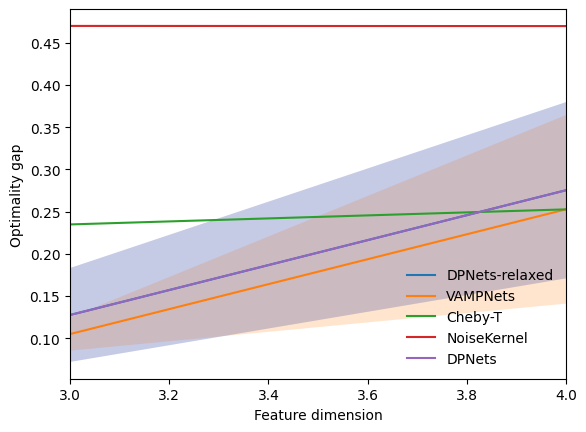

In [22]:
fig, ax = plt.subplots()
series = "hausdorff-distance"
for report in reports:
    x, y, model_name = get_series(report, series)
    _, dy, _ = get_series(report, series +"_std")
    ax.plot(x, y, label=model_name)
    ax.fill_between(x, y - dy, y + dy, alpha=0.2)
ax.set_xlabel("Feature dimension")
ax.set_ylabel("Optimality gap")
ax.set_xmargin(0)
ax.legend(frameon=False)

In [46]:
def plot_eigs(reports, feature_dim):
    fig, ax = plt.subplots(figsize=(5, 5))  
    #Activate grid
    ax.grid(True, which='both')
    #Plot unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), color='k', lw=0.75)   
    for report in reports:
        feature_dims, eigs, model_name = get_eigs(report)
        feature_idx = np.where(feature_dims == feature_dim)[0][0]
        eigs = eigs[feature_idx]
        print(f"{model_name} eigenvalues: {eigs}")
        ax.scatter(eigs.real, eigs.imag, label = model_name)
    ax.scatter(logistic.eig().real, logistic.eig().imag, marker='x', color='k', label = 'True eigenvalues')
    ax.set_xlabel('Real part')
    ax.set_ylabel('Imaginary part')
    ax.legend(frameon=False, loc='lower center', bbox_to_anchor=(0, 1, 1, 0), ncol=3, fontsize=8)
    ax.set_aspect('equal')

DPNets-relaxed eigenvalues: [[ 0.93641384+0.j          0.19674268+0.14065944j  0.19674268-0.14065944j
  -0.52160519+0.j        ]
 [ 0.93400791+0.j         -0.2320171 +0.29415922j -0.2320171 -0.29415922j
   0.1930634 +0.j        ]]
VAMPNets eigenvalues: [[ 0.92283111+0.j          0.18952677+0.13085181j  0.18952677-0.13085181j
  -0.50374208+0.j        ]
 [ 0.91227497+0.j         -0.22364776+0.29311297j -0.22364776-0.29311297j
   0.16310128+0.j        ]]
Cheby-T eigenvalues: [ 1.          0.08180851  0.01367603 -0.35882616]
NoiseKernel eigenvalues: [ 5.30149370e-01 -2.46589227e-01  8.98218381e-02  7.25707303e-05]
DPNets eigenvalues: [[ 0.93641384+0.j          0.19674268+0.14065944j  0.19674268-0.14065944j
  -0.52160519+0.j        ]
 [ 0.93400791+0.j         -0.2320171 +0.29415922j -0.2320171 -0.29415922j
   0.1930634 +0.j        ]]


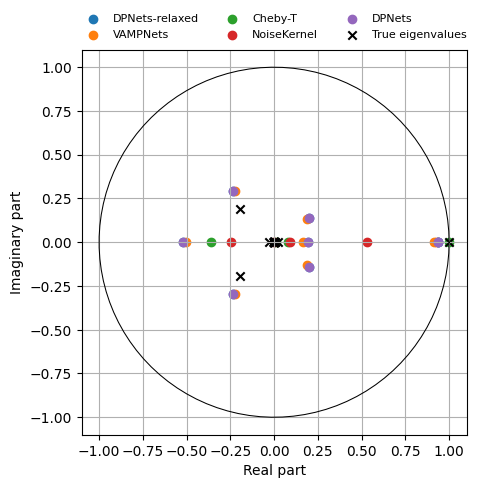

In [47]:
plot_eigs(reports, 3)

In [45]:
feature_dims, eigs, model_name = get_eigs(reports[-1])

In [37]:
eigs

[array([[ 0.94439923+0.j        , -0.0793459 +0.j        ,
         -0.2097636 +0.j        ],
        [ 0.92808763+0.j        , -0.18694608+0.17162445j,
         -0.18694608-0.17162445j]]),
 array([[ 0.93641384+0.j        ,  0.19674268+0.14065944j,
          0.19674268-0.14065944j, -0.52160519+0.j        ],
        [ 0.93400791+0.j        , -0.2320171 +0.29415922j,
         -0.2320171 -0.29415922j,  0.1930634 +0.j        ]])]

In [32]:
feature_dims

array([2, 3])